# Scipy fitting example


In [1]:
from scipy import optimize as op
#import scipy.optmize as op
import numpy as np

In [2]:
x = np.linspace(0,10, 5)

In [17]:
y =  x*np.cos(x *4) 
dy = 0.2+0.3*y

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

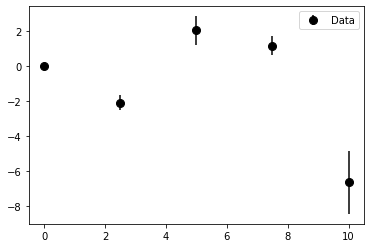

In [19]:

style = {'marker': 'o', 'color': 'black', 'markersize': 8,
         'linestyle': '', 'zorder': 10, 'label': 'Data'}
plt.errorbar(x, y, **style , yerr=dy)
plt.legend()

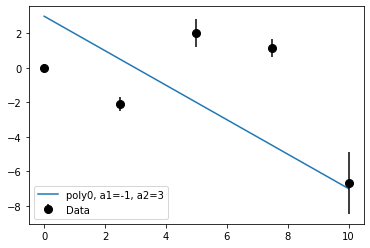

In [20]:
def polyOrder1(x, a1, a2):
    return a1*x + a2

xgranular = np.linspace(0,10, 1000)

plt.errorbar(x, y, **style , yerr=dy)
plt.plot(xgranular, polyOrder1(xgranular,-1, 3), label="poly0, a1=-1, a2=3") # let's guess some parameters to start
plt.legend()

In [22]:
params, cov = op.curve_fit(polyOrder1, x, y, sigma=dy)

In [23]:
params

array([ 0.01984445, -0.20952196])

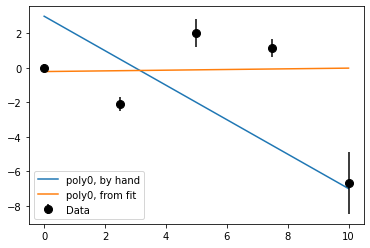

In [24]:
plt.errorbar(x, y, **style , yerr=dy)
plt.plot(xgranular, polyOrder1(xgranular,-1, 3), label="poly1, by hand") # let's guess some parameters to start
plt.plot(xgranular, polyOrder1(xgranular,params[0], params[1]), label="poly1, from fit")
plt.legend()

In [25]:
def polyOrder3(x, a1, a2, a3, a4):
    return a1*x**3 + a2*x**2 + a3*x + a4

In [26]:
params, cov = op.curve_fit(polyOrder3, x, y, sigma=dy)

In [27]:
params

array([-0.07619056,  0.95273175, -2.66121858, -0.0107425 ])

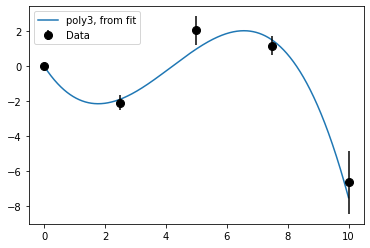

In [28]:
plt.errorbar(x, y, **style , yerr=dy)
plt.plot(xgranular, polyOrder3(xgranular,*params), label="poly3, from fit")

plt.legend()

# exercise in fitting
- generate 10 data points between 10 and 20, where the y=values are given by `tan(0.5*x)+x`, and make a plot of these data as black circles, with error equal to 0.5+0.1*y
- define a function which constructs a polynomial of order 2 and 3
- use curve_fit to djust the parameters of these to fit the data

- finally, define a function whivch returns `y=tan(a1*x)+b*x` and fit that, check that you recover thre correct a1 and a2

In [33]:
x = np.linspace(10, 20, 10)
y= np.tan(x*0.5)+x
yerr= 0.5+0.1*y

<ErrorbarContainer object of 3 artists>

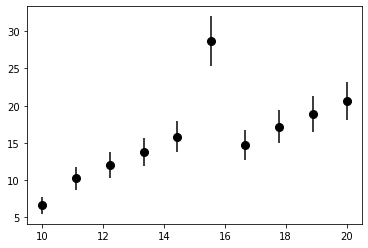

In [42]:
plt.errorbar(x, y, yerr=yerr, **style)

In [68]:
def poly1 (x, a1, a2):
    return a1*x**1 + a2

def poly2 (x, a1, a2, a3):
    return a1*x**2 + a2*x**1 +a3

def poly3 (x, a1, a2, a3, a4):
    return a1*x**3 + a2*x**2 +a3*x + a4

def poly4 (x, a1, a2, a3, a4, a5):
    return a1*x**4 + a2*x**3 + a3*x**2 +a4*x + a5

def myfunc(x, a):
    return np.tan(a*x) + x

In [59]:
params1, cov1 = op.curve_fit(poly1, x, y, sigma=yerr)
params2, cov2 = op.curve_fit(poly2, x, y, sigma=yerr)
params3, cov3 = op.curve_fit(poly3, x, y, sigma=yerr)
params4, cov4 = op.curve_fit(poly4, x, y, sigma=yerr)
paramsmy, covmy = op.curve_fit(myfunc, x, y, sigma=yerr)

(0.0, 40.0)

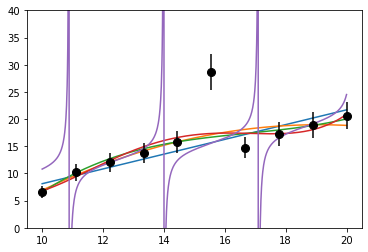

In [60]:
plt.errorbar(x, y, yerr=yerr, **style)
x1 = np.linspace(10, 20, 1000) #plot more points for the function
plt.plot(x1, poly1(x1, *params1), label='poly1')
plt.plot(x1, poly2(x1, *params2), label='poly2')
plt.plot(x1, poly3(x1, *params3), label='poly3')
plt.plot(x1, poly4(x1, *params4), label='poly4')
plt.plot(x1, myfunc(x1, *paramsmy), label='my function')

plt.ylim(0, 40)

In [61]:
paramsmy

array([1.0101153])

In [72]:
def chi2( func, x, y, errs, *params):
     return np.sum( (func(x, *params)-y)**2 / errs**2 )
    

In [69]:
a = np.linspace(0, 10, 100)

In [70]:
myfunc(x, a[0])

array([10.        , 11.11111111, 12.22222222, 13.33333333, 14.44444444,
       15.55555556, 16.66666667, 17.77777778, 18.88888889, 20.        ])

In [71]:
a[0]

0.0

In [73]:
chi2_val = chi2(myfunc, x, y, yerr, (a[0]) )